In [3]:
# Importing the libraries that we will need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [4]:
#Uploading the data
data = pd.read_excel('SVMdataset.xlsx')
data.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


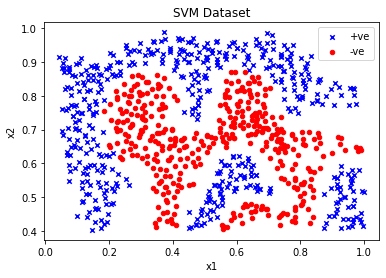

In [5]:
#Visualizing the entire data
ax = data[data['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve');
data[data['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve', ax=ax);
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Dataset')
plt.show()

In [7]:
#extracting the features matrices 
feature_data = data[['x1', 'x2']]
X = np.asarray(feature_data)
X[0:5]

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       [0.15553  , 0.784357 ],
       [0.210829 , 0.866228 ]])

In [10]:
#extracting the labels vector
labels = data['y']
y = np.asarray(labels)
y.shape

(863,)

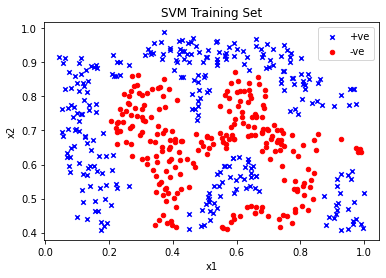

In [11]:
# Splittinng the data into train, test, and validation sets
#We split the data for 20% test and another 80%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#We split the 80% to 25% vallidation and the rest for the train,
#the train is then 60% of the original data and the validation is 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=1)
#Visualizing the train, test, and the validation data
#Creating a data farme for the train
data_train = pd.DataFrame({'x1':X_train[:,0],'x2':X_train[:,1],'y':y_train})
#Visualizing the train
ax = data_train[data_train['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve');
data_train[data_train['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve', ax=ax);
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Training Set')
plt.show()

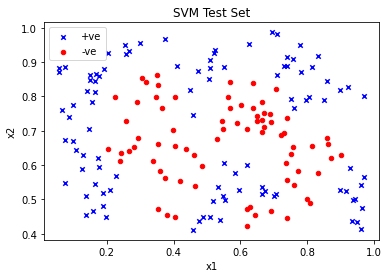

In [12]:
#Creating a data frame for the test
data_test = pd.DataFrame({'x1':X_test[:,0],'x2':X_test[:,1],'y':y_test})
ax = data_test[data_test['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve');
data_test[data_test['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve', ax=ax);
#Visualizing the test
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Test Set')
plt.show()

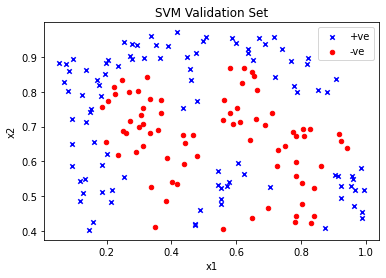

In [13]:
#Creating a data frame for the validation set
data_val = pd.DataFrame({'x1':X_val[:,0],'x2':X_val[:,1],'y':y_val})
ax = data_val[data_val['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve');
data_val[data_val['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve', ax=ax);
#Visualizing the test
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Validation Set')
plt.show()

In [14]:
#Creating 2 SVM Models
#Creating an SVM classifier with a gaussian kernel
clf_gaussian = svm.SVC(kernel='rbf')
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(clf_gaussian, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
clf_gaussian  = grid
y_hat1_train = clf_gaussian.predict(X_train)
y_hat1_test = clf_gaussian.predict(X_test)
y_hat1_val = clf_gaussian.predict(X_val)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.544, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.544, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.544, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.544, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.553, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.544, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.544, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.553, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.846, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.779, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.835, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.757, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


In [16]:
#Creating an SVMm classifier with a linear kernel
L = np.linspace(-1,2,20)
best_f1 = -1;
for c in L:
    clf_linear = svm.SVC(kernel='linear',C=10**c) 
    clf_linear.fit(X_train,y_train)
    yhat = clf_linear.predict(X_val)
    if best_f1<f1_score(y_val, yhat, average='weighted'):
        best_f1 = f1_score(y_val, yhat, average='weighted')
        clf_linear_best = clf_linear
        C = 10**c
print('The C value that gives the best f1 score on the validation set is:',round(C,2))
#Predicting the values for the train,test,and
y_hat2_train = clf_linear_best.predict(X_train)
y_hat2_test = clf_linear_best.predict(X_test)
y_hat2_val = clf_linear_best.predict(X_val)

The C value that gives the best f1 score on the validation set is: 0.43


In [17]:
#Evaluating the models
#Confusion Matrices of both the linear and gaussian kernels for the 3 datasets
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

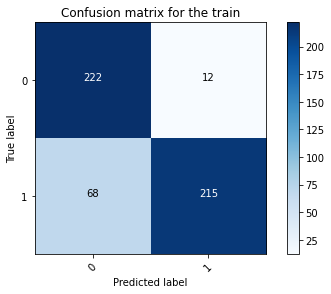

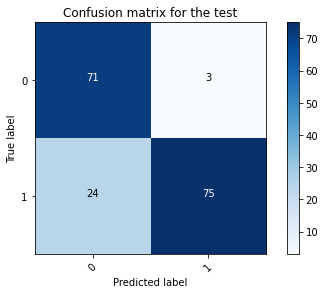

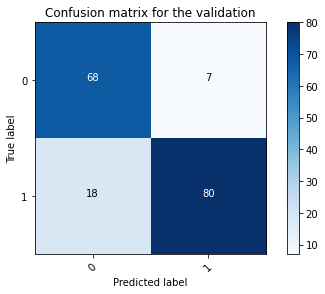

In [18]:
# The confusion matrices for the gaussian kernel
# Compute confusion matrix
cnf_matrix1 = confusion_matrix(y_train, y_hat1_train, labels=[0,1])
cnf_matrix2 = confusion_matrix(y_test, y_hat1_test, labels=[0,1])
cnf_matrix3 = confusion_matrix(y_val, y_hat1_val, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(1)
plot_confusion_matrix(cnf_matrix1, classes=['0','1'],normalize= False,  title='Confusion matrix for the train')
plt.figure(2)
plot_confusion_matrix(cnf_matrix2, classes=['0','1'],normalize= False,  title='Confusion matrix for the test')
plt.figure(3)
plot_confusion_matrix(cnf_matrix3, classes=['0','1'],normalize= False,  title='Confusion matrix for the validation')

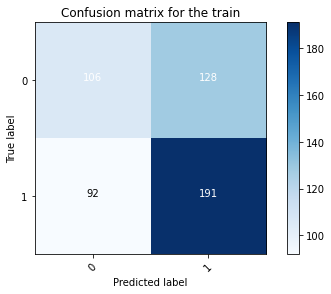

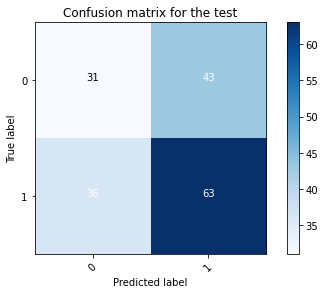

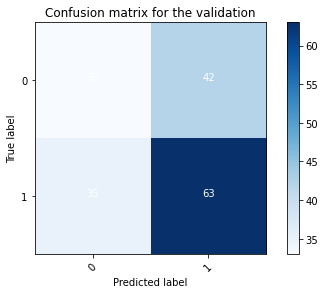

In [19]:
#Confusion Matrices for the 3 datasets, predictions by the linear kernel
# Compute confusion matrix
cnf_matrix1 = confusion_matrix(y_train, y_hat2_train, labels=[0,1])
cnf_matrix2 = confusion_matrix(y_test, y_hat2_test, labels=[0,1])
cnf_matrix3 = confusion_matrix(y_val, y_hat2_val, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(1)
plot_confusion_matrix(cnf_matrix1, classes=['0','1'],normalize= False,  title='Confusion matrix for the train')
plt.figure(2)
plot_confusion_matrix(cnf_matrix2, classes=['0','1'],normalize= False,  title='Confusion matrix for the test')
plt.figure(3)
plot_confusion_matrix(cnf_matrix3, classes=['0','1'],normalize= False,  title='Confusion matrix for the validation')


Text(0.5, 1.0, 'Decision surface of linear SVC - Train Set ')

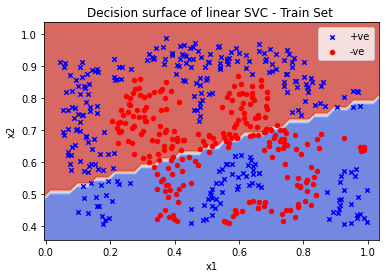

In [20]:
#Showing the Decisions Boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-0.05, x.max()+0.05
    y_min, y_max = y.min()-0.05, y.max()+0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax,clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC - Train Set ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax,clf_linear_best,xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
data_train[data_train['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve',ax=ax);
data_train[data_train['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve',ax=ax);
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title(title)


Text(0.5, 1.0, 'Decision surface of linear SVC - Test Set ')

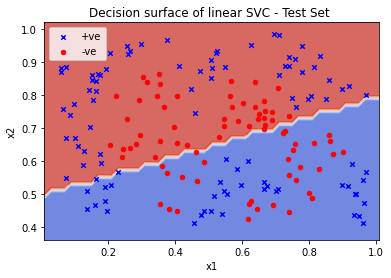

In [21]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC - Test Set ')
# Set-up grid for plotting.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_linear_best,xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
data_test[data_test['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve',ax=ax);
data_test[data_test['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve',ax=ax);
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title(title)

Text(0.5, 1.0, 'Decision surface of linear SVC - Validation Set ')

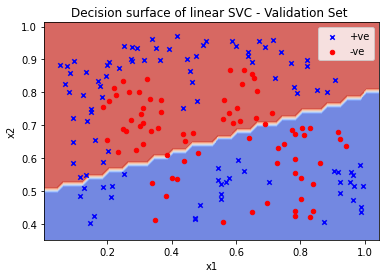

In [22]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC - Validation Set ')
# Set-up grid for plotting.
X0, X1 = X_val[:, 0], X_val[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_linear_best,xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
data_val[data_val['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve',ax=ax);
data_val[data_val['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve',ax=ax);
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title(title)

Text(0.5, 1.0, 'Decision surface of Gaussian SVC - Train Set ')

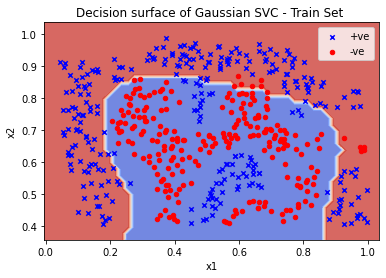

In [23]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Gaussian SVC - Train Set ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_gaussian,xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
data_train[data_train['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve',ax=ax);
data_train[data_train['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve',ax=ax);
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title(title)

Text(0.5, 1.0, 'Decision surface of Gaussian SVC - Test Set ')

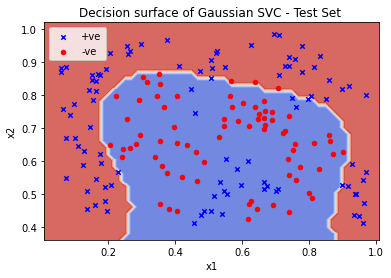

In [24]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Gaussian SVC - Test Set ')
# Set-up grid for plotting.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_gaussian,xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
data_test[data_test['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve',ax=ax);
data_test[data_test['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve',ax=ax);
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title(title)

Text(0.5, 1.0, 'Decision surface of Gaussian SVC - Validation Set')

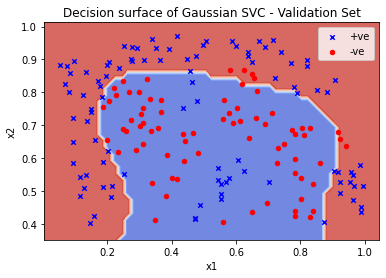

In [25]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Gaussian SVC - Validation Set')
# Set-up grid for plotting.
X0, X1 = X_val[:, 0], X_val[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax,clf_gaussian,xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
data_val[data_val['y'] == 1].plot(kind='scatter', x='x1', y='x2', color='blue', marker='x',label='+ve',ax=ax);
data_val[data_val['y'] == 0].plot(kind='scatter', x='x1', y='x2', color='red', label='-ve',ax=ax);
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title(title)

In [26]:
## Classification Report for the Linear SVM for: Train, Test, Validation
print ('Train:\n',classification_report(y_train, y_hat2_train))
print ('Test:\n',classification_report(y_test, y_hat2_test))
print ('Validation:\n',classification_report(y_val, y_hat2_val))

Train:
               precision    recall  f1-score   support

           0       0.54      0.45      0.49       234
           1       0.60      0.67      0.63       283

    accuracy                           0.57       517
   macro avg       0.57      0.56      0.56       517
weighted avg       0.57      0.57      0.57       517

Test:
               precision    recall  f1-score   support

           0       0.46      0.42      0.44        74
           1       0.59      0.64      0.61        99

    accuracy                           0.54       173
   macro avg       0.53      0.53      0.53       173
weighted avg       0.54      0.54      0.54       173

Validation:
               precision    recall  f1-score   support

           0       0.49      0.44      0.46        75
           1       0.60      0.64      0.62        98

    accuracy                           0.55       173
   macro avg       0.54      0.54      0.54       173
weighted avg       0.55      0.55      0.55   

In [27]:
#Classification Report for the Gaussian SVM for: Train, Test, Validation
print ('Train:\n',classification_report(y_train, y_hat1_train))
print ('Test:\n',classification_report(y_test, y_hat1_test))
print ('Validation:\n',classification_report(y_val, y_hat1_val))

Train:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       234
           1       0.95      0.76      0.84       283

    accuracy                           0.85       517
   macro avg       0.86      0.85      0.85       517
weighted avg       0.86      0.85      0.85       517

Test:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84        74
           1       0.96      0.76      0.85        99

    accuracy                           0.84       173
   macro avg       0.85      0.86      0.84       173
weighted avg       0.87      0.84      0.84       173

Validation:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84        75
           1       0.92      0.82      0.86        98

    accuracy                           0.86       173
   macro avg       0.86      0.86      0.85       173
weighted avg       0.86      0.86      0.86   